# Assignment 2 :sklearn boston data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

# Data Loading

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.shape

(506, 13)

#### Explore Dataset first to know it what is boston dataset

In [4]:
# keys in data set
print(boston.keys())    

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
 #describe dataset and find the columns name
print(boston.DESCR)    

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Extracting Features name 

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Reload bos DataFrame with fearure names

In [7]:
bos= pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add target( dependent variable price to the frame)
 MEDV-------> Median value of owner-occupied homes in $1000's

In [8]:
bos['MEDV']=boston.target

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull() and columns equality

#### Check complete info

In [10]:
bos.info()   # depict that all columns contains equal 506 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


#### check null values explicitly

In [11]:
bos.isnull().sum()   # contains no null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.
Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


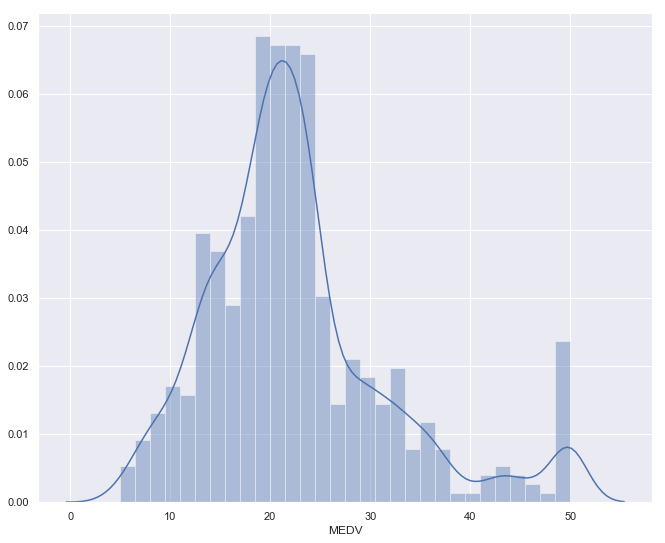

In [12]:
import seaborn as sns
#explanation of seaborn distplot()
# https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.set(rc={'figure.figsize':(11,9)})  
sns.distplot(bos['MEDV'], bins=30)    #more-- https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
plt.show()

We see that the values of MEDV are **distributed normally** with few outliers.

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the **corr** function from the pandas dataframe library.

We will use the heatmap function from the seaborn library to plot the correlation matrix.

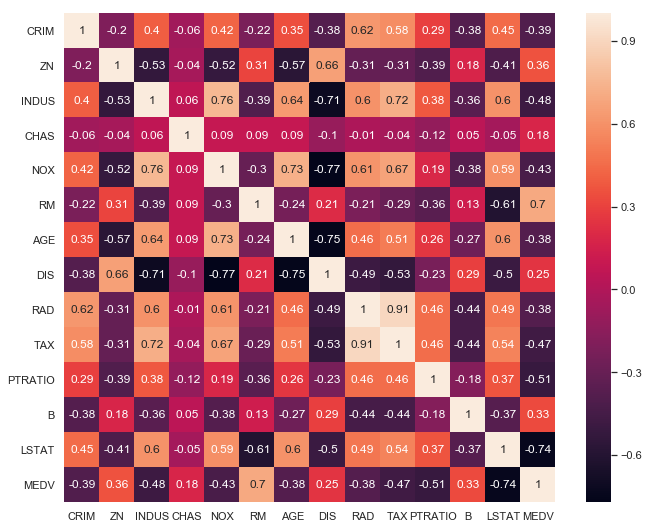

In [13]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

## Observations:
   **To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).**
    
   **An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.**
        
Based on the above observations we will **RM and LSTAT** as our features. Using a scatter plot let’s see how these features vary with **MEDV**.

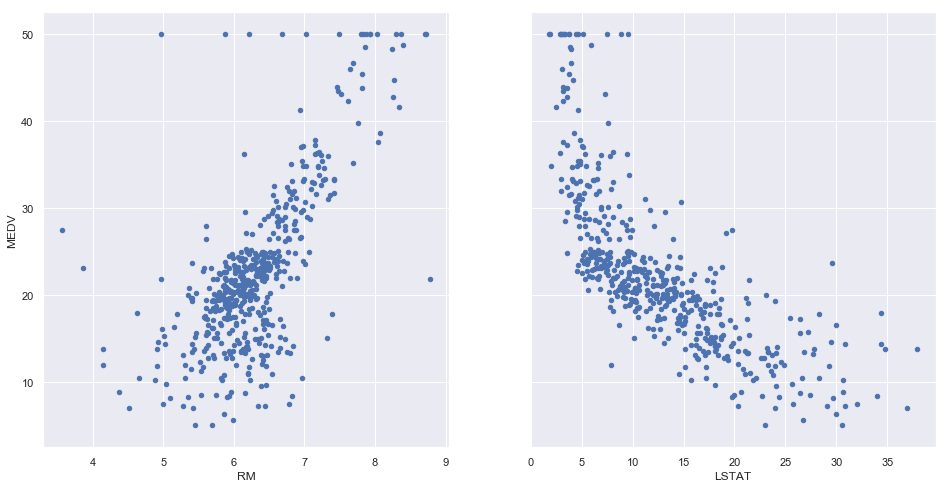

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
bos.plot(kind='scatter', x='RM', y='MEDV', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='LSTAT', y='MEDV', ax=axs[1])


### Observations:
The prices increase as the value of **RM** increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in **LSTAT**. Though it doesn’t look to be following exactly a linear line.

## Preparing the data for training the model & import the liner regression from sk learn

In [15]:
# create X and y
feature_cols = ['LSTAT', 'RM']
X = bos[feature_cols]
Y = bos['MEDV']



# #or We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.
# X1 = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM']], columns = ['LSTAT','RM'])

#both are similar

## Splitting the data into training and testing sets

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use **train_test_split** function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)




(404, 2)
(102, 2)
(404,)
(102,)


**random_state** ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order

# Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
my_Model= LinearRegression()
my_Model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model evaluation

In [18]:
print(my_Model.intercept_)        
print(my_Model.coef_)  

2.7362403426066315
[-0.71722954  4.58938833]


IN [-0.71722954  4.58938833] first one is negative slope for LSTAT means having less relation with price increment rather than RM, **means as the RM will increases the price (MEDV) will increase by 4.589 in $1000s.**

In [19]:
#random prediction


### First We will evaluate our model using RMSE and R2-score.

In [20]:
# model evaluation for training set
y_train_predict = my_Model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = my_Model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702913
R2 score is 0.662899697518695


## Observations:  https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. ... Lower values of RMSE indicate better fit.

## Evaluating model by stats OLS method

### claculating confidence interval

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='MEDV ~ RM + LSTAT', data=bos).fit()
lm.conf_int(alpha = 0.05)   # will provide dataframe of (interval of intercept) as Intercept and (interval of slopes) as RM, 95% confidence interval
# lm.conf_int()    # will by default provide 95% confidence interval between parameters 

#note: Confidence interval would based on the student's t-distribution

,0,1
Intercept,-7.591900,4.875355
RM,4.221550,5.968026
LSTAT,-0.728277,-0.556440


Our slope (predicted-4.58938833) for RM (in my_model) is in between of 95% confidence interval, same for LSTAT -0.71722954 is in above confidence interval but negative slope

In [22]:
lm.rsquared   # closer to the r2_score and towards 1

0.6385616062603404

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean.

In [23]:
lm.pvalues     # very less hance not in critical region

Intercept    6.687649e-01
RM           3.472258e-27
LSTAT        6.669365e-41
dtype: float64

In [24]:
lm.bse     #standard error

Intercept    3.172828
RM           0.444466
LSTAT        0.043731
dtype: float64

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          7.01e-112
Time:                        17:40:36   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

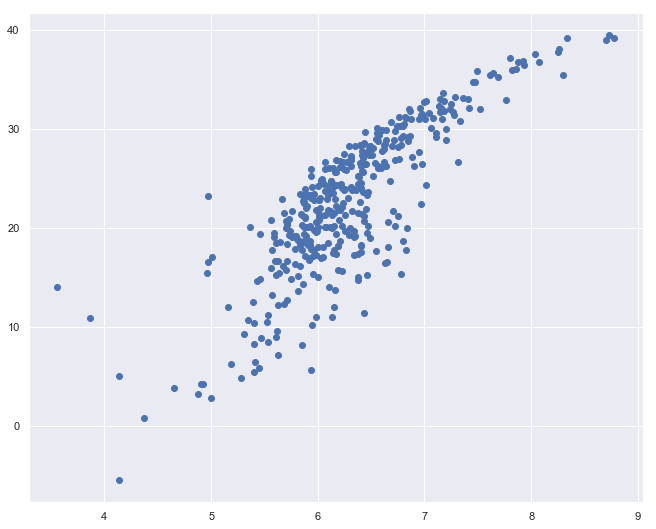

In [54]:
# visualize the relationship between the features and the response using scatterplots

plt.scatter(x=X_train['RM'], y=my_Model.predict(X_train))


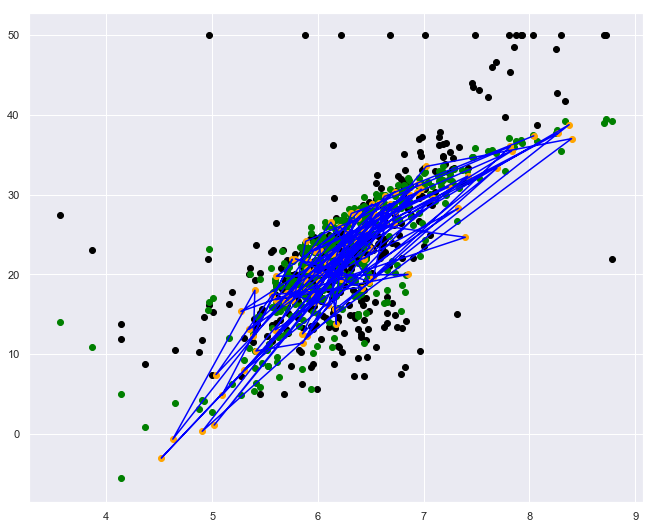

In [63]:
plt.scatter(X_train['RM'], Y_train,  color='black')
plt.scatter(X_train['RM'], y_train_predict,  color='green')
plt.scatter(X_test['RM'], y_test_predict,  color='orange')
plt.plot(X_test['RM'], y_test_predict, color='blue')

In [35]:
X_train['RM']

33     5.701
283    7.923
418    5.957
502    6.120
402    6.404
368    4.970
201    6.162
310    4.973
343    6.696
230    5.981
395    6.471
197    7.107
451    6.655
145    6.130
184    5.604
47     6.030
9      6.004
244    5.593
340    5.968
306    7.420
334    6.310
331    5.706
53     5.998
101    6.781
464    6.209
218    5.951
117    6.021
195    7.875
162    7.802
219    6.373
       ...  
468    5.926
30     5.713
431    6.833
65     6.290
203    7.853
205    5.891
44     6.069
27     6.047
80     6.727
437    6.152
113    6.092
399    5.852
204    8.034
7      6.172
208    6.064
158    6.066
112    5.913
411    6.657
446    6.341
231    7.412
228    7.686
8      5.631
73     6.245
400    5.987
118    5.872
486    6.114
189    7.185
495    5.670
206    6.326
355    5.936
Name: RM, Length: 404, dtype: float64

### Conclusion
In this story, we applied the concepts of linear regression on the Boston housing dataset. I would recommend to try out other datasets as well.
Here are a few places you can look for data

https://www.kaggle.com/datasets

https://toolbox.google.com/datasetsearch

https://archive.ics.uci.edu/ml/datasets.html

